#### Concentration Ratios - Ny Res Fuel 1.0% Sulfur Swap - Futures and Options

In [20]:
import quandl
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [21]:
b = pd.read_csv('CFTC-MM_FO_L_ALL_CR.csv')
b.head()

,Date,"Largest 4 Longs, Gross","Largest 4 Shorts, Gross","Largest 8 Longs, Gross","Largest 8 Shorts, Gross","Largest 4 Longs, Net","Largest 4 Shorts, Net","Largest 8 Longs, Net","Largest 8 Shorts, Net"
0,2016-12-20,73.6,54.2,95.5,75.6,51.9,38.5,58.9,53.5
1,2016-12-13,74.5,53.4,95.8,76.2,51.8,36.8,57.1,51.4
2,2016-12-06,75.2,54.1,96.7,77.2,52.5,37.7,57.8,52.9
3,2016-11-29,69.2,56.9,95.7,78.1,44.0,28.1,48.7,41.8
4,2016-11-22,68.8,57.0,95.6,78.5,43.7,28.1,48.5,41.6


In [22]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
Date                       556 non-null object
Largest 4 Longs, Gross     556 non-null float64
Largest 4 Shorts, Gross    556 non-null float64
Largest 8 Longs, Gross     556 non-null float64
Largest 8 Shorts, Gross    556 non-null float64
Largest 4 Longs, Net       556 non-null float64
Largest 4 Shorts, Net      556 non-null float64
Largest 8 Longs, Net       556 non-null float64
Largest 8 Shorts, Net      556 non-null float64
dtypes: float64(8), object(1)
memory usage: 39.2+ KB


In [23]:
b.columns = ['Date','Long_g_4', 'Short_g_4', 'Long_8_g','Short_8_g','Long_4_n','Short_4_n','Long_8_n','Short_8_n']

In [24]:
#b = b.apply(pd.to_numeric, args=('coerce',))

In [25]:
b.columns

Index(['Date', 'Long_g_4', 'Short_g_4', 'Long_8_g', 'Short_8_g', 'Long_4_n',
       'Short_4_n', 'Long_8_n', 'Short_8_n'],
      dtype='object')

In [26]:
b.describe()

,Long_g_4,Short_g_4,Long_8_g,Short_8_g,Long_4_n,Short_4_n,Long_8_n,Short_8_n
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,56.697302,51.428597,77.334532,72.636511,41.677338,37.282374,51.437230,48.812410
std,9.550600,7.890183,8.213406,6.219862,12.048456,11.023556,12.341879,11.766484
min,33.200000,32.200000,57.500000,54.400000,9.800000,9.400000,15.700000,13.600000
25%,51.400000,46.000000,72.775000,68.400000,33.350000,29.375000,43.600000,41.150000
50%,57.450000,50.000000,76.900000,73.300000,43.150000,38.400000,54.150000,51.100000
75%,62.900000,56.900000,82.525000,76.925000,51.100000,44.400000,60.500000,57.125000
max,77.600000,71.700000,96.700000,85.800000,66.000000,63.700000,75.800000,72.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF2C048>]],
      dtype=object)

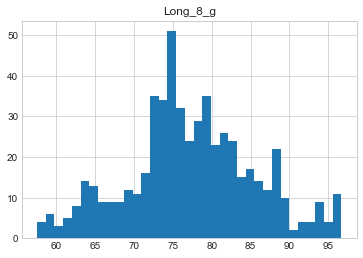

In [27]:
b.hist('Long_8_g', grid = True, bins = 35)

In [28]:
b.sort_values(by='Short_g_4', ascending=0).head()

,Date,Long_g_4,Short_g_4,Long_8_g,Short_8_g,Long_4_n,Short_4_n,Long_8_n,Short_8_n
319,2010-06-22,57.6,71.7,79.6,84.5,36.1,44.6,44.1,48.0
321,2010-06-08,57.1,71.6,80.0,85.1,37.9,46.2,45.9,49.6
320,2010-06-15,57.4,71.2,79.9,84.3,37.0,44.8,44.7,48.0
318,2010-06-29,57.7,71.2,79.5,84.3,34.9,43.9,43.4,47.7
161,2013-07-02,72.3,70.8,89.6,84.4,65.6,63.7,73.1,71.5


In [29]:
b.Short_8_g.idxmax()

327

In [30]:
b.Short_8_g.idxmin()

505

In [31]:
b.groupby(['Date', 'Long_g_4','Short_g_4']).size().head()

Date        Long_g_4  Short_g_4
2005-11-29  61.4      52.9         1
2005-12-13  58.9      51.7         1
2005-12-20  63.2      54.1         1
2005-12-27  58.4      54.1         1
2006-01-10  57.3      51.8         1
dtype: int64

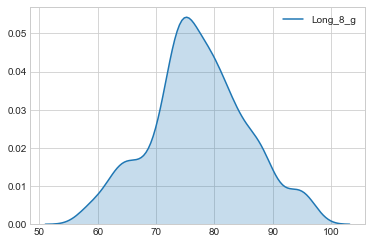

In [32]:
sns.kdeplot(b.Long_8_g, shade = True)

In [33]:
import matplotlib.pyplot as plt

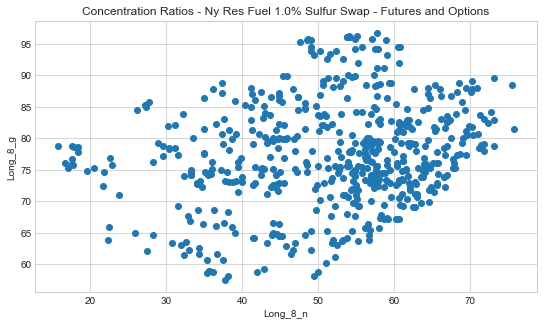

In [34]:
plt.figure(figsize = (9,5))
plt.scatter(b.Long_8_n, b.Long_8_g)
plt.xlabel('Long_8_n')
plt.ylabel('Long_8_g')
plt.title('Concentration Ratios - Ny Res Fuel 1.0% Sulfur Swap - Futures and Options')
plt.show()

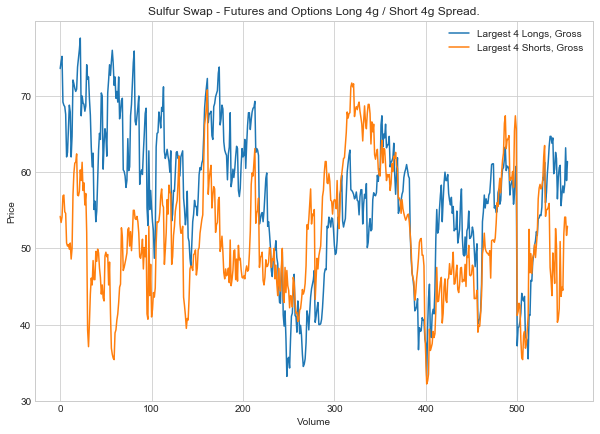

In [35]:
plt.figure(figsize = (10,7))
plt.plot(b.Long_g_4, label ='Largest 4 Longs, Gross')
plt.plot(b.Short_g_4, label = 'Largest 4 Shorts, Gross')
plt.ylabel('Price')
plt.xlabel('Volume')
plt.legend()
plt.title('Sulfur Swap - Futures and Options Long 4g / Short 4g Spread.')
plt.show()

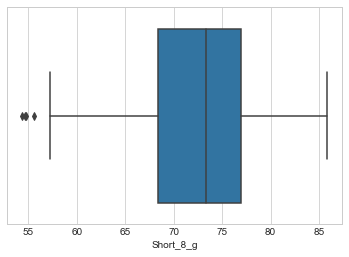

In [36]:
sns.boxplot(b.Short_8_g)
plt.show()

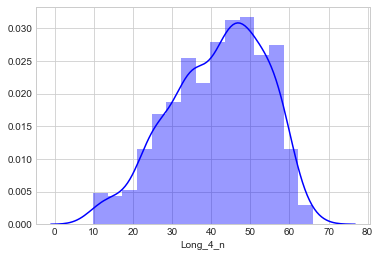

In [37]:
sns.distplot(b.Long_4_n.dropna(),bins = 15, color = 'b')

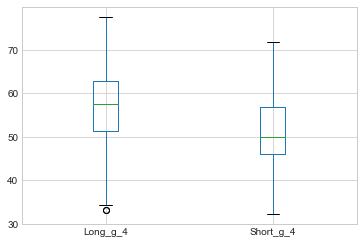

In [38]:
# compare two values
b[['Long_g_4','Short_g_4']].plot.box(grid = True)

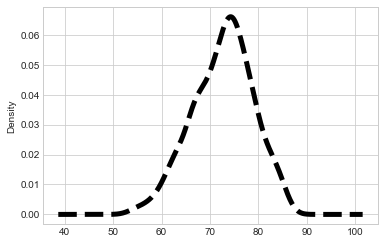

In [39]:
b['Short_8_g'].plot.kde(lw = 5, ls = '--', color = 'k')

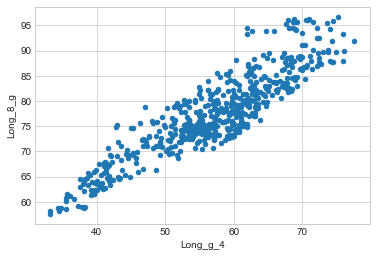

In [40]:
b.plot.scatter(x='Long_g_4',y='Long_8_g')

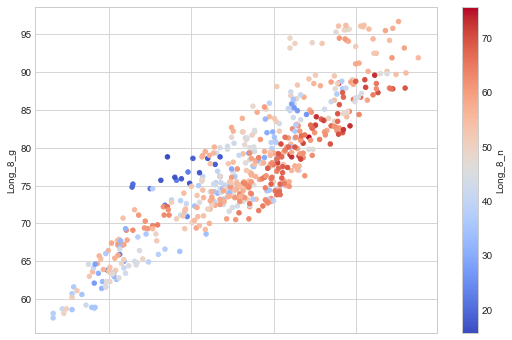

In [41]:
b.plot.scatter(x='Long_g_4',y='Long_8_g',c='Long_8_n', cmap='coolwarm',figsize = (9,6))

In [42]:
correlation = b.corr()
correlation

,Long_g_4,Short_g_4,Long_8_g,Short_8_g,Long_4_n,Short_4_n,Long_8_n,Short_8_n
Long_g_4,1.000000,0.351455,0.901307,0.410772,0.594076,0.162275,0.376353,0.192303
Short_g_4,0.351455,1.000000,0.251843,0.812549,0.282611,0.570864,0.229780,0.355955
Long_8_g,0.901307,0.251843,1.000000,0.402277,0.422358,-0.037672,0.222166,0.017788
Short_8_g,0.410772,0.812549,0.402277,1.000000,0.079727,0.288931,0.016840,0.147520
Long_4_n,0.594076,0.282611,0.422358,0.079727,1.000000,0.721176,0.939593,0.808038
Short_4_n,0.162275,0.570864,-0.037672,0.288931,0.721176,1.000000,0.804338,0.931600
Long_8_n,0.376353,0.229780,0.222166,0.016840,0.939593,0.804338,1.000000,0.917762
Short_8_n,0.192303,0.355955,0.017788,0.147520,0.808038,0.931600,0.917762,1.000000


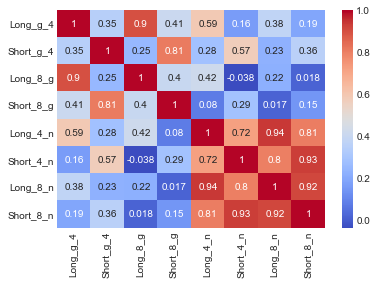

In [43]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [44]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
Date         556 non-null object
Long_g_4     556 non-null float64
Short_g_4    556 non-null float64
Long_8_g     556 non-null float64
Short_8_g    556 non-null float64
Long_4_n     556 non-null float64
Short_4_n    556 non-null float64
Long_8_n     556 non-null float64
Short_8_n    556 non-null float64
dtypes: float64(8), object(1)
memory usage: 39.2+ KB


## Linear Regression Analysis

In [45]:
b.columns

Index(['Date', 'Long_g_4', 'Short_g_4', 'Long_8_g', 'Short_8_g', 'Long_4_n',
       'Short_4_n', 'Long_8_n', 'Short_8_n'],
      dtype='object')

In [46]:
X = b[['Long_g_4', 'Short_g_4', 'Long_8_g', 'Short_8_g', 'Long_4_n',
       'Short_4_n', 'Short_8_n']]

In [47]:
y = b['Long_8_n']

In [48]:
from sklearn import datasets
from sklearn import linear_model

In [50]:
from sklearn.cross_validation import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=10)

In [52]:
lm = linear_model.LinearRegression()

In [53]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print(lm.intercept_)

9.187274865034503


In [55]:
lm.coef_

array([-0.21135006,  0.0086555 ,  0.17163731, -0.13639517,  0.63767189,
       -0.15324001,  0.60531254])

In [56]:
X_train.columns

Index(['Long_g_4', 'Short_g_4', 'Long_8_g', 'Short_8_g', 'Long_4_n',
       'Short_4_n', 'Short_8_n'],
      dtype='object')

In [57]:
cdf = pd.DataFrame(lm.coef_ , X.columns, columns = ['Coeff'])

In [58]:
cdf.T

,Long_g_4,Short_g_4,Long_8_g,Short_8_g,Long_4_n,Short_4_n,Short_8_n
Coeff,-0.21135,0.008655,0.171637,-0.136395,0.637672,-0.15324,0.605313


In [59]:
predict = lm.predict(X_test)
type(predict)

numpy.ndarray

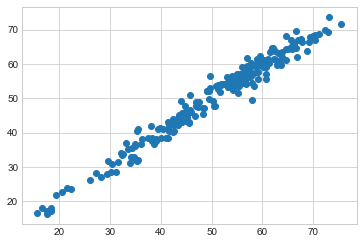

In [60]:
plt.scatter(y_test, predict)

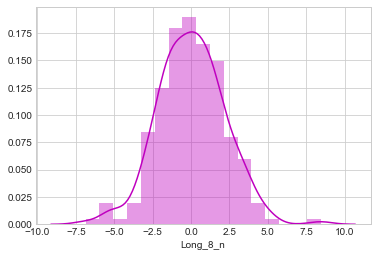

In [61]:
sns.distplot((y_test - predict),color = 'm')

In [62]:
from sklearn import metrics

In [63]:
metrics.mean_absolute_error(y_test, predict)

1.6886434198794702

In [64]:
metrics.mean_squared_error(y_test, predict)

4.648190067519132

In [65]:
np.sqrt(metrics.mean_squared_error(y_test, predict))

2.1559661563946526